In [1]:
from pyprojroot import here
import sys
# spyder up to find the root
root = here(project_files=[".here"])
# append to path
sys.path.append(str(here()))

In [4]:
import geemap.eefolium as geemap
from src.data import ee_download

def generate_polygon(bbox):
    """
    Generates a list of coordinates: [[x1,y1],[x2,y2],[x3,y3],[x4,y4],[x1,y1]]
    """
    return [[bbox[0],bbox[1]],
             [bbox[2],bbox[1]],
             [bbox[2],bbox[3]],
             [bbox[0],bbox[3]],
             [bbox[0],bbox[1]]]

In [4]:
import ee

ee.Initialize()
from datetime import datetime, timedelta

date_event = datetime.strptime("19-11-2020","%d-%m-%Y")
lat,lng = 15.445372970198596, -87.91212639442612


date_end_search = date_event + timedelta(days=20)
lng_size, lat_size = .1,.1
bbox = (lng-lng_size,lat-lat_size, 
        lng+lng_size,lat+lat_size)

loc = ee.Geometry.Polygon(generate_polygon(bbox))

img_col_all,n_images_col = ee_download.get_collection("COPERNICUS/S2",date_event,date_end_search,loc)

print(f"There are {n_images_col} in the collection")
assert n_images_col > 0, "No images were found for those conditions"
    

img_col = ee_download.collection_mosaic_day(img_col_all, loc)
n_images_col = int(img_col.size().getInfo())
print(f"There are {n_images_col} images in the collection")

Map = geemap.Map()

imgs_list = img_col.toList(n_images_col, 0)
for i in range(n_images_col):
    img_show = ee.Image(imgs_list.get(i))
    Map.addLayer(img_show.clip(loc), 
                 {"min":0, "max":3000, "bands":["B4","B3","B2"]},f"S2 {i}", True)

Map.centerObject(loc)
Map.addLayerControl()
Map

There are 16 in the collection
There are 4 images in the collection


In [5]:
import geopandas as gpd
feat_col = ee_download.img_collection_to_feature_collection(img_col_all)
filename = ee_download.export_eeFeatureCollection(feat_col)
data = gpd.read_file(filename)
data["date"] = data["system:time_start"].apply(lambda x: datetime.utcfromtimestamp(x/1000.))
data

,id,system:time_start,geometry,date
0,20201122T161611_20201122T162626_T16PCB,1606062567883,"POLYGON ((-88.84097 15.36959, -88.84102 15.369...",2020-11-22 16:29:27.883
1,20201122T161611_20201122T162626_T16PCC,1606062553428,"POLYGON ((-87.84030 15.28669, -87.84021 15.286...",2020-11-22 16:29:13.428
2,20201122T161611_20201122T162626_T16PDB,1606062564752,"POLYGON ((-86.90923 15.37721, -86.90924 15.377...",2020-11-22 16:29:24.752
3,20201122T161611_20201122T162626_T16PDC,1606062550113,"POLYGON ((-86.90882 16.28090, -86.90884 16.280...",2020-11-22 16:29:10.113
4,20201127T161619_20201127T162301_T16PCB,1606494565815,"POLYGON ((-88.83429 15.36747, -88.83430 15.367...",2020-11-27 16:29:25.815
5,20201127T161619_20201127T162301_T16PCC,1606494551344,"POLYGON ((-88.63137 16.26700, -88.63138 16.266...",2020-11-27 16:29:11.344
6,20201127T161619_20201127T162301_T16PDB,1606494562684,"POLYGON ((-86.90923 15.37721, -86.90924 15.377...",2020-11-27 16:29:22.684
7,20201127T161619_20201127T162301_T16PDC,1606494548035,"POLYGON ((-86.90882 16.28090, -86.90884 16.280...",2020-11-27 16:29:08.035
8,20201202T161641_20201202T162718_T16PCB,1606926565183,"POLYGON ((-88.83539 15.36857, -88.83541 15.368...",2020-12-02 16:29:25.183
9,20201202T161641_20201202T162718_T16PCC,1606926550720,"POLYGON ((-87.84434 16.27919, -87.84438 16.279...",2020-12-02 16:29:10.720


In [6]:
import geopandas as gpd
feat_col = ee_download.img_collection_to_feature_collection(img_col)
filename = ee_download.export_eeFeatureCollection(feat_col)
data = gpd.read_file(filename)
data["date"] = data["system:time_start"].apply(lambda x: datetime.utcfromtimestamp(x/1000.))
data

,id,system:time_start,geometry,date
0,2020-11-22,1606024298910,"POLYGON ((-180.00000 -90.00000, 180.00000 -90....",2020-11-22 05:51:38.910
1,2020-11-27,1606456298910,"POLYGON ((-180.00000 -90.00000, 180.00000 -90....",2020-11-27 05:51:38.910
2,2020-12-02,1606888298910,"POLYGON ((-180.00000 -90.00000, 180.00000 -90....",2020-12-02 05:51:38.910
3,2020-12-07,1607320298910,"POLYGON ((-180.00000 -90.00000, 180.00000 -90....",2020-12-07 05:51:38.910


In [78]:
import os
# Export 
BANDS_EXPORT = ["B1", "B2", "B3", "B4", "B5",
                "B6", "B7", "B8", "B8A", "B9",
                "B10", "B11", "B12", "QA60"]

img_export = ee.Image(imgs_list.get(1))
img_export = img_export.select(BANDS_EXPORT).clip(loc) # .resample('bicubic') resample cannot be used on composites

bucket_name= "ml4floods"

export_task_fun_img = ee_download.export_task_image(bucket=bucket_name)

filename = os.path.join("preingest", "S2", "image_name_cool")
desc = os.path.basename(filename) + "S2"
task = ee_download.mayberun(filename, desc,
                            lambda : img_export,
                            export_task_fun_img,
                            overwrite=True, dry_run=False,
                            bucket_name=bucket_name, verbose=2)


image_name = f"gs://{bucket_name}/{filename}.tif"

# task = ee.batch.Export.image.toDrive(img_export,
#                                      folder="ee_ipl_uv_downloads",
#                                      description="S2_worldfloods",
#                                      crs='EPSG:4326', # Use CRS of image to mask methane
#                                      scale=10,
#                                      formatOptions={"cloudOptimized": True}) # To display nicely in GEE

# task.start()
task.status()

{'state': 'READY',
 'description': 'image_name_coolS2',
 'creation_timestamp_ms': 1614107847608,
 'update_timestamp_ms': 1614107847608,
 'start_timestamp_ms': 0,
 'task_type': 'EXPORT_IMAGE',
 'id': 'JCIKRDNHPG73GMMPRJBRHHTK',
 'name': 'projects/earthengine-legacy/operations/JCIKRDNHPG73GMMPRJBRHHTK'}

In [77]:
# Map = geemap.Map()
# Map.addLayer(ee.Image(imgs_list.get(1)).select(BANDS_EXPORT).toFloat().clip(loc), 
#              {"min":0, "max":3000., "bands":["B4","B3","B2"]},f"S2 {i}", True)
# Map.centerObject(loc)
# Map.addLayerControl()
# Map

In [80]:
task.status()

{'state': 'COMPLETED',
 'description': 'image_name_coolS2',
 'creation_timestamp_ms': 1614107847608,
 'update_timestamp_ms': 1614107992422,
 'start_timestamp_ms': 1614107863602,
 'task_type': 'EXPORT_IMAGE',
 'destination_uris': ['https://console.developers.google.com/storage/browser/ml4floods/preingest/S2/'],
 'attempt': 1,
 'id': 'JCIKRDNHPG73GMMPRJBRHHTK',
 'name': 'projects/earthengine-legacy/operations/JCIKRDNHPG73GMMPRJBRHHTK'}

In [8]:
import rasterio

with rasterio.open(image_name) as src:
    image = src.read()
    transform = src.transform

image.shape

(14, 2228, 2227)

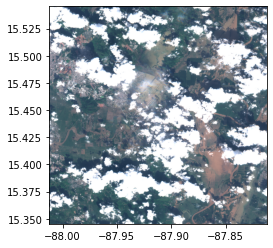

<AxesSubplot:>

In [11]:
from rasterio import plot as rasterioplt
import numpy as np

rgb = np.clip(image[(3,2,1),...]/3000.,0,1)
    
rasterioplt.show(rgb, transform=transform)

In [12]:
image[(3,2,1),...]

array([[[4382, 4112, 3889, ...,  747,  747,  713],
        [4126, 3864, 3743, ...,  819,  819,  787],
        [3988, 3830, 3712, ...,  884,  884,  873],
        ...,
        [ 579,  637,  634, ...,  656,  647,  656],
        [ 645,  671,  671, ...,  609,  615,  615],
        [ 642,  597,  597, ...,  589,  586,  586]],

       [[4188, 3902, 3759, ...,  987,  987,  942],
        [4025, 3848, 3776, ..., 1033, 1033, 1018],
        [3987, 3844, 3710, ..., 1128, 1128, 1107],
        ...,
        [1006,  999, 1047, ...,  914,  913,  889],
        [1058, 1071, 1071, ...,  878,  878,  844],
        [1071,  956,  956, ...,  848,  862,  838]],

       [[4333, 4146, 4101, ..., 1234, 1234, 1198],
        [4265, 4135, 4067, ..., 1301, 1301, 1256],
        [4063, 3922, 3906, ..., 1386, 1386, 1378],
        ...,
        [1060, 1083, 1080, ..., 1185, 1172, 1169],
        [1107, 1120, 1120, ..., 1155, 1150, 1115],
        [1085, 1066, 1066, ..., 1117, 1122, 1107]]], dtype=uint16)

In [45]:
!gsutil ls gs://ml4floods/preingest/S2/image_name_cool.tif

gs://ml4floods/preingest/S2/image_name_cool.tif
